In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [5]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [10]:
# to convert dataframe into Dictionary as mongoDB stores data in records
data=df.to_dict(orient='records')

In [14]:
data[:1]

[{'day': '01',
  'month': '06',
  'year': '2012',
  'Temperature': '29',
  ' RH': '57',
  ' Ws': '18',
  'Rain ': '0',
  'FFMC': '65.7',
  'DMC': '3.4',
  'DC': '7.6',
  'ISI': '1.3',
  'BUI': '3.4',
  'FWI': '0.5',
  'Classes  ': 'not fire   '}]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### Data Cleaning

In [19]:
# columns which has null values.
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


## The dataset is converted into two sets based on Region from 122th index, we can make a newcolumns based on the region
1 : 'Bejaia Region dataset'
2 : 'Sidi-Bel Abbes Region Dataset'

In [20]:
# Adding newcolumns with Region.
df.loc[:122,'Region']=1
df.loc[122: , 'Region']=2
df[['Region']]=df[['Region']].astype(int)

## To remove the null and na value from rows

In [24]:
df[df.isnull().any(axis=1)].shape

(2, 15)

In [37]:
df=df.dropna().reset_index(drop=True)

In [41]:
df.shape

(244, 15)

In [42]:
## Row which has string value.
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,2


In [43]:
# to delecte the row which has string value.
df=df.drop(122).reset_index(drop=True)

## Some colums names were misspaced so we can fix it.

In [45]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [48]:
# spaces were fixed in the columns names.
df.columns=df.columns.str.strip()

In [49]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [50]:
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
Region          int64
dtype: object

In [52]:
# changing the other clumns as integer datatype.
df[['month','day','year','Temperature', 'RH','Ws']]=df[['month','day','year','Temperature', 'RH','Ws']].astype(int)

In [60]:
# objects=[features for features in df.columns if df[features].dtypes=='O']

In [61]:
# objects

['Classes']

In [56]:
# changing the other columns to float data type.
objects=[features for features in df.columns if df[features].dtypes=='O']
for i in objects:
    if i !='Classes':
        df[i]=df[i].astype(float)

In [58]:
objects

['Classes']

In [62]:
"""
objects=[features for features in df.columns if df[features].dtypes=='O']
for i in objects:
        df[i]=df[i].astype(float)
"""


"\nobjects=[features for features in df.columns if df[features].dtypes=='O']\nfor i in objects:\n        df[i]=df[i].astype(float)\n"

In [63]:
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region           int64
dtype: object

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


In [71]:
# df.Classes.value_counts()

In [70]:
# check Unique value of target variable.
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [72]:
##  Looking like values were missspaced so we can use str.strip() method to solve this probelm.

In [73]:
df.Classes=df.Classes.str.strip()

In [76]:
df['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

## Region 1 (Bejaia Region)

In [77]:
df[:122]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,not fire,1
118,27,9,2012,31,66,11,0.0,85.7,8.3,24.9,4.0,9.0,4.1,fire,1
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,1


## Region 2 (Bejaia Region)

In [79]:
df[122:]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,2
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,2
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,2
125,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,2
126,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2


## Exploratory data Analysis (EDA)

In [80]:
# Droping Year Features
df1=df.drop(['day','month','year'],axis=1)

In [82]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [83]:
# Encoding not Fire as 0 and fire as 1.
df1['Classes']=np.where(df['Classes']=='not fire',0,1)

In [84]:
df1['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

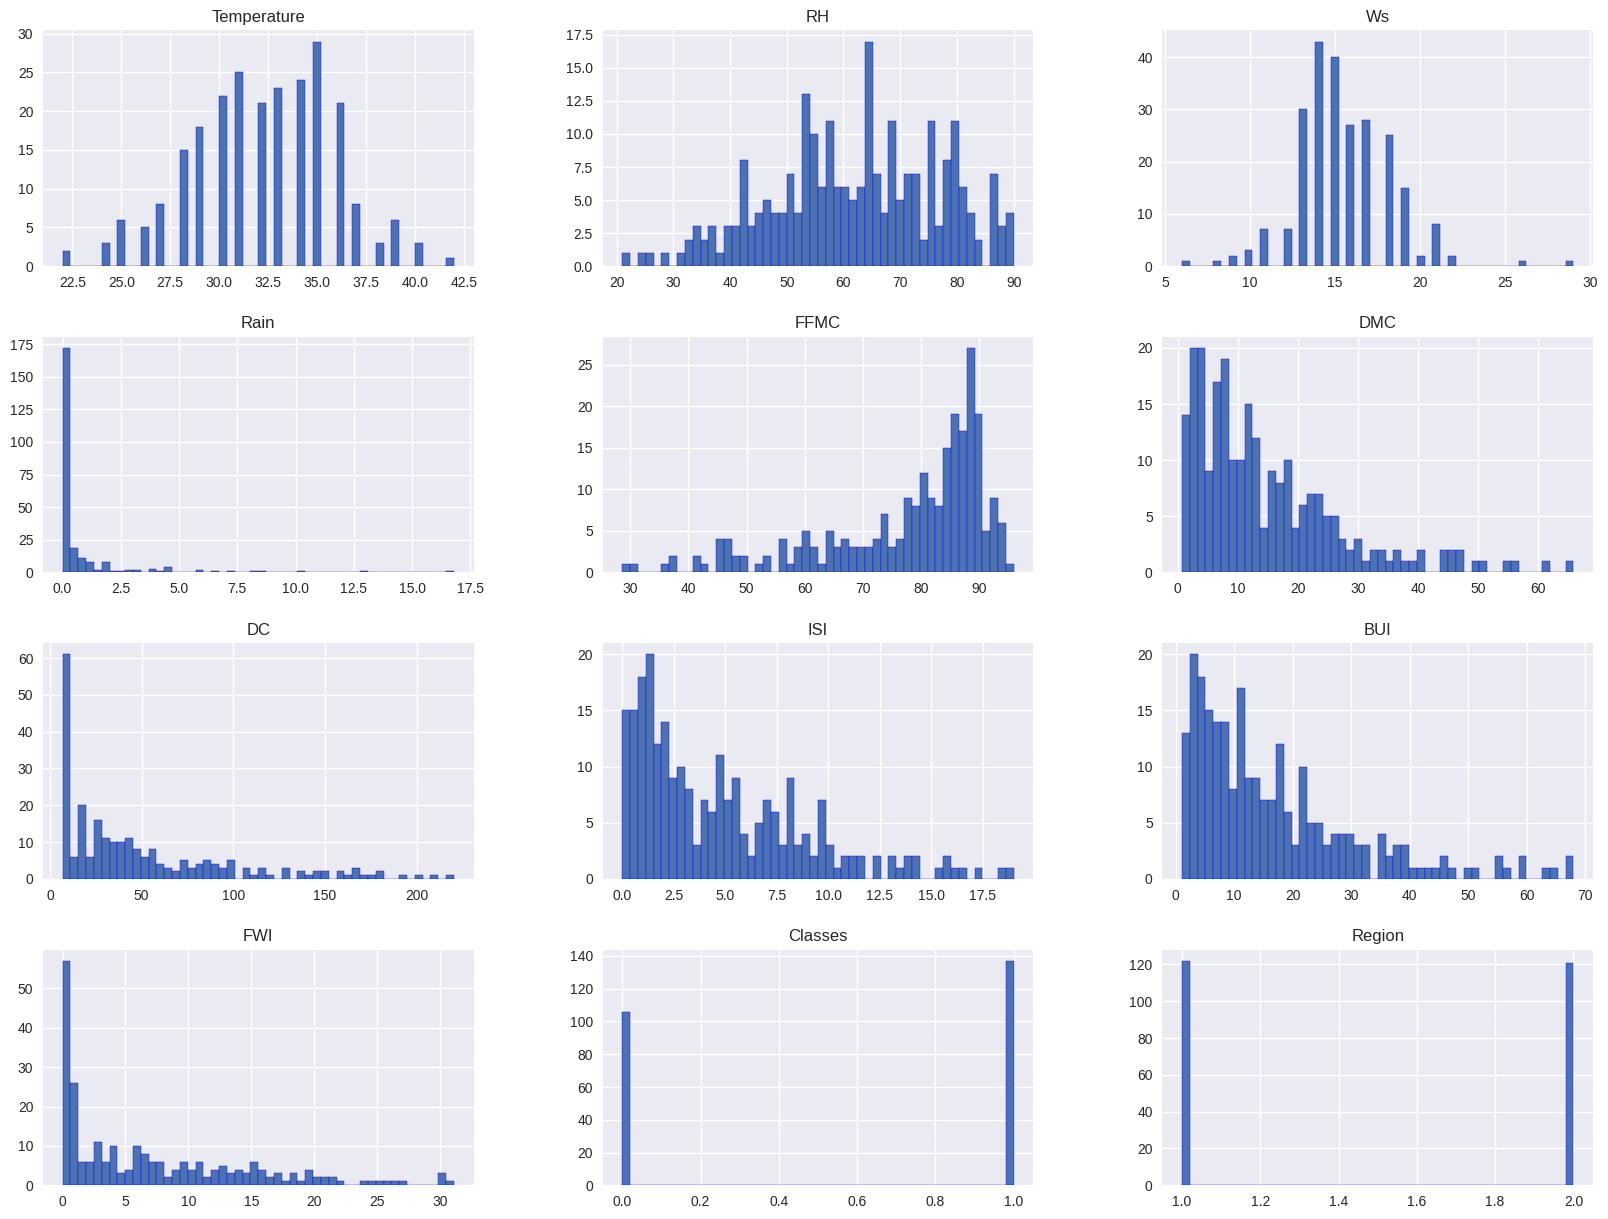

In [85]:
# plot density plot for all feature
plt.style.use('seaborn')
df1.hist(bins=50, figsize=(20,15),ec='b')
plt.show()

In [86]:
# percantage for piechart.
percentage= df.Classes.value_counts(normalize=True)*100

In [87]:
percentage

fire        56.378601
not fire    43.621399
Name: Classes, dtype: float64

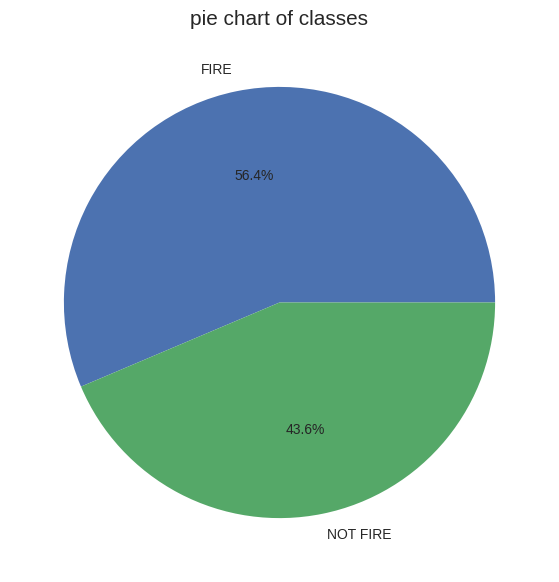

In [89]:
# plotting piechart.
Classeslabels=['FIRE','NOT FIRE']
plt.figure(figsize=(12,7))
plt.pie(percentage, labels=Classeslabels, autopct='%1.1f%%')
plt.title('pie chart of classes',fontsize=15)
plt.show()